In [10]:
# read csv
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv(r"C:\Users\mmsso\Downloads\Energy_consumption_dataset.csv")

In [11]:
df

Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0         1     0  Saturday      No    25.139433  43.431581    1565.693999   
1         1     1  Saturday      No    27.731651  54.225919    1411.064918   
2         1     2  Saturday      No    28.704277  58.907658    1755.715009   
3         1     3  Saturday      No    20.080469  50.371637    1452.316318   
4         1     4  Saturday      No    23.097359  51.401421    1094.130359   
...     ...   ...       ...     ...          ...        ...            ...   
4995     12     6    Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17    Monday      No    20.007565  42.765607    1999.982252   
4997     12    13  Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8  Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1  Saturday     Yes    25.802872  41.798829    1793.658686   

      Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0             5        On           Off         2.774699          75.364373  
1             1        On            On        21.831384          83.401855  
2             2       Off           Off         6.764672          78.270888  
3             1       Off            On         8.623447          56.519850  
4             9        On           Off         3.071969          70.811732  
...         ...       ...           ...              ...                ...  
4995          7        On            On        20.591717          70.270344  
4996          5       Off            On         7.536319          73.943071  
4997          5       Off            On        28.162193          85.784613  
4998          2        On            On        20.918483          63.784001  
4999          6       Off           Off         8.334079          53.263278  

[5000 rows x 12 columns]

In [12]:
# display the first 50 rows of the dataframe
df.head(5000)

Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0         1     0  Saturday      No    25.139433  43.431581    1565.693999   
1         1     1  Saturday      No    27.731651  54.225919    1411.064918   
2         1     2  Saturday      No    28.704277  58.907658    1755.715009   
3         1     3  Saturday      No    20.080469  50.371637    1452.316318   
4         1     4  Saturday      No    23.097359  51.401421    1094.130359   
...     ...   ...       ...     ...          ...        ...            ...   
4995     12     6    Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17    Monday      No    20.007565  42.765607    1999.982252   
4997     12    13  Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8  Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1  Saturday     Yes    25.802872  41.798829    1793.658686   

      Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0             5        On           Off         2.774699          75.364373  
1             1        On            On        21.831384          83.401855  
2             2       Off           Off         6.764672          78.270888  
3             1       Off            On         8.623447          56.519850  
4             9        On           Off         3.071969          70.811732  
...         ...       ...           ...              ...                ...  
4995          7        On            On        20.591717          70.270344  
4996          5       Off            On         7.536319          73.943071  
4997          5       Off            On        28.162193          85.784613  
4998          2        On            On        20.918483          63.784001  
4999          6       Off           Off         8.334079          53.263278  

[5000 rows x 12 columns]

In [13]:
#display the last 50 rows of the dataframe
df.tail(50)

Month  Hour  DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
4950     12    22     Sunday      No    25.794301  42.972427    1331.684185   
4951     12    17    Tuesday     Yes    26.434020  52.866494    1717.073073   
4952     12     1     Sunday      No    20.007565  35.802928    1999.982252   
4953     12    10     Friday     Yes    25.189867  30.015975    1289.488962   
4954     12    22     Sunday      No    26.211451  58.224408    1904.483694   
4955     12    19     Sunday     Yes    25.036341  39.581418    1275.862761   
4956     12     0   Saturday     Yes    24.534298  40.146157    1241.115351   
4957     12     2  Wednesday      No    22.804003  52.687322    1657.975337   
4958     12    12   Saturday     Yes    22.342787  59.470995    1374.944782   
4959     12    20     Monday      No    25.667719  47.864162    1725.714913   
4960     12    19     Sunday      No    20.929719  49.548384    1919.472532   
4961     12    23   Saturday      No    21.090868  50.339542    1788.756557   
4962     12    17   Saturday      No    20.007565  54.770217    1193.916937   
4963     12    15    Tuesday      No    26.017531  59.016391    1744.432860   
4964     12    18  Wednesday     Yes    22.697063  51.091185    1726.641848   
4965     12    14     Monday      No    24.342171  47.876491    1611.529633   
4966     12    17   Saturday     Yes    24.685099  39.675559    1750.338822   
4967     12    16   Thursday      No    24.027917  30.015975    1490.569903   
4968     12     3  Wednesday     Yes    21.924978  47.874385    1659.379060   
4969     12    13  Wednesday      No    29.998671  55.825295    1552.358147   
4970     12    12    Tuesday     Yes    24.975218  31.254243    1753.049294   
4971     12    18   Saturday      No    23.655029  59.969085    1207.521164   
4972     12     9     Monday      No    26.304737  31.479276    1477.146028   
4973     12    21     Sunday      No    27.929574  47.887621    1262.765306   
4974     12    17     Friday      No    20.877597  54.661713    1833.907515   
4975     12     8     Friday     Yes    20.007565  50.612211    1628.029423   
4976     12    19  Wednesday      No    26.711342  51.462474    1441.445919   
4977     12     8     Monday      No    29.998671  44.365994    1259.417262   
4978     12    15    Tuesday      No    26.137818  46.290965    1000.512661   
4979     12    19   Saturday     Yes    29.252144  54.882144    1942.775924   
4980     12     4     Friday     Yes    25.623848  30.015975    1682.631247   
4981     12     4  Wednesday     Yes    26.908227  59.969085    1584.417579   
4982     12    19     Friday      No    25.017597  50.468351    1493.850290   
4983     12    16     Sunday      No    27.408887  56.525403    1441.220239   
4984     12    13     Friday      No    28.769146  59.969085    1853.859860   
4985     12    22  Wednesday     Yes    23.192571  58.465341    1430.805459   
4986     12    14   Saturday     Yes    24.550482  49.576684    1088.182555   
4987     12    15  Wednesday      No    27.019655  30.015975    1919.675356   
4988     12     4     Monday      No    20.007565  32.329919    1523.599469   
4989     12     1     Friday     Yes    23.852533  31.832450    1550.373230   
4990     12    17     Friday      No    26.656032  50.266501    1686.134682   
4991     12     7     Monday      No    22.075505  50.440339    1776.059835   
4992     12    18     Friday      No    22.812709  45.675570    1491.654728   
4993     12    18     Sunday      No    24.932388  57.466207    1595.115001   
4994     12     1   Saturday     Yes    26.298721  44.554798    1654.879176   
4995     12     6     Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17     Monday      No    20.007565  42.765607    1999.982252   
4997     12    13   Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8   Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1   Saturday     Yes    25.802872  41.79

In [14]:
#This method generates descriptive statistics of your data, such as count, mean, standard deviation, minimum, and maximum values for numerical columns.
df.describe()
# Count: Shows the number of non-missing (non-NaN) values for each column.
#Mean: Displays the average value for each column.
#Standard Deviation (std): Measures how much the data varies from the mean.
# Minimum (min): The smallest value in each column.
# 25th Percentile (25%): The value below which 25% of the data falls (first quartile).
#50th Percentile (50%): Also known as the median; the middle value when the data is ordered.
#75th Percentile (75%): The value below which 75% of the data falls (third quartile).
# Maximum (max): The largest value in each column.

Month         Hour  Temperature     Humidity  SquareFootage  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      6.251200    11.556000    24.946823    45.478146    1507.403201   
std       3.588687     6.888306     3.041678     8.972690     293.147209   
min       1.000000     0.000000    20.007565    30.015975    1000.512661   
25%       3.000000     6.000000    22.453790    38.111104    1253.906598   
50%       6.000000    11.000000    24.831846    45.793124    1513.581105   
75%       9.000000    18.000000    27.427281    52.696651    1754.846457   
max      12.000000    23.000000    29.998671    59.969085    1999.982252   

         Occupancy  RenewableEnergy  EnergyConsumption  
count  5000.000000      5000.000000        5000.000000  
mean      4.576000        15.201195          76.794919  
std       2.906185         9.157038           9.231573  
min       0.000000         0.006642          53.263278  
25%       2.000000         7.477928          70.419588  
50%       5.000000        15.343830          76.696267  
75%       7.000000        22.889997          83.246274  
max       9.000000        29.965327          99.201120

In [15]:
#an overview of a DataFrame like  DataFrame's summary information, like data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [16]:
df.describe

<bound method NDFrame.describe of       Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0         1     0  Saturday      No    25.139433  43.431581    1565.693999   
1         1     1  Saturday      No    27.731651  54.225919    1411.064918   
2         1     2  Saturday      No    28.704277  58.907658    1755.715009   
3         1     3  Saturday      No    20.080469  50.371637    1452.316318   
4         1     4  Saturday      No    23.097359  51.401421    1094.130359   
...     ...   ...       ...     ...          ...        ...            ...   
4995     12     6    Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17    Monday      No    20.007565  42.765607    1999.982252   
4997     12    13  Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8  Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1  Saturday     Yes    25.802872  41.798829    1793.658686   

      Occupancy HVACUsage Lig

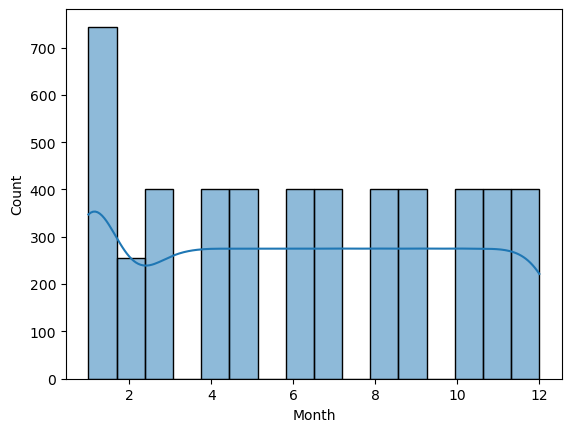

In [17]:
# Univariate Analysis: Numerical
sns.histplot(df['Month'], kde=True).set_title('')
plt.show()

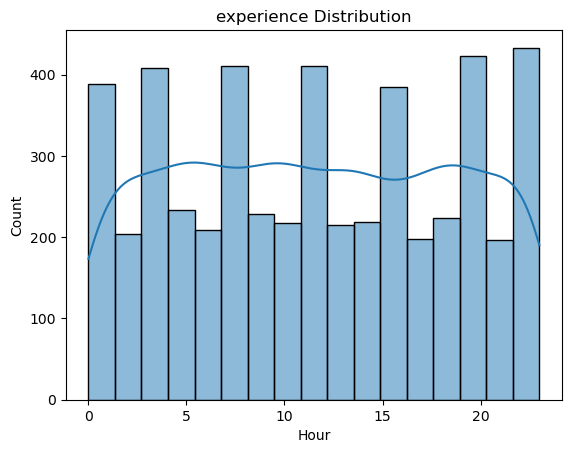

In [18]:
# Univariate Analysis: Numerical
sns.histplot(df['Hour'], kde=True).set_title('experience Distribution')
plt.show()

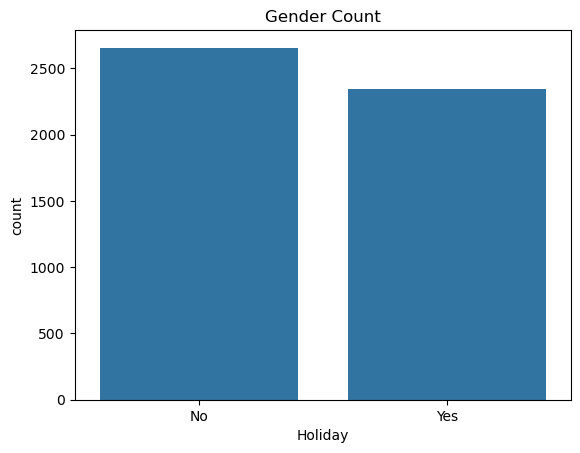

In [19]:
sns.countplot(x='Holiday',data=df).set_title('Gender Count')
plt.show()

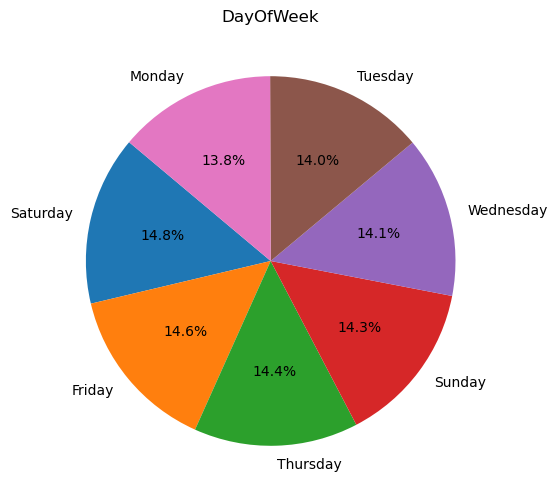

In [20]:
# Univariate Pie Chart
gender_counts = df['DayOfWeek'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('DayOfWeek')
plt.show()

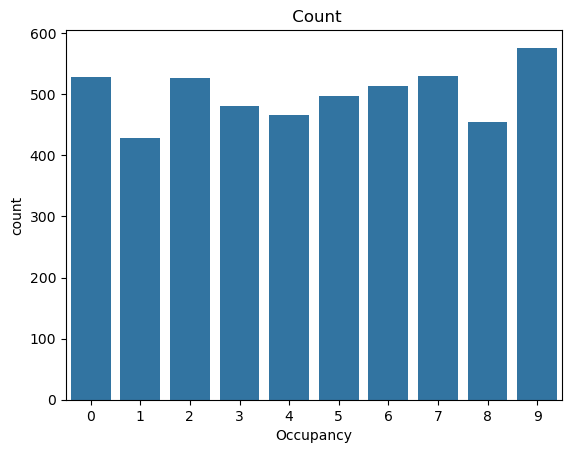

In [24]:
#Univariate Analysis
sns.countplot(x='Occupancy', data=df).set_title(' Count')
plt.show()

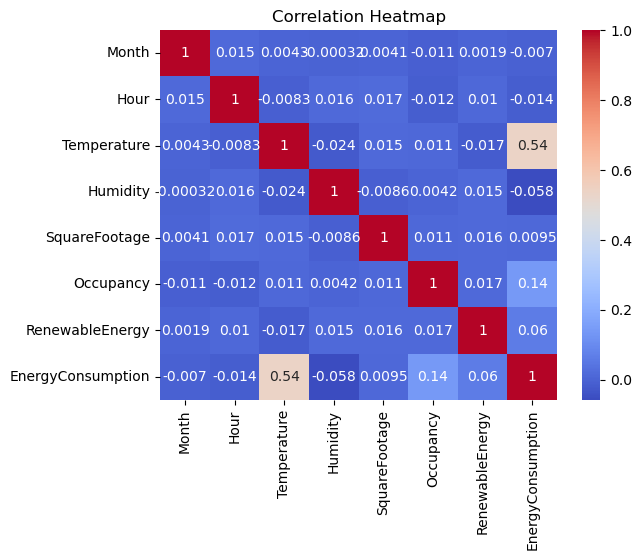

In [29]:
#heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

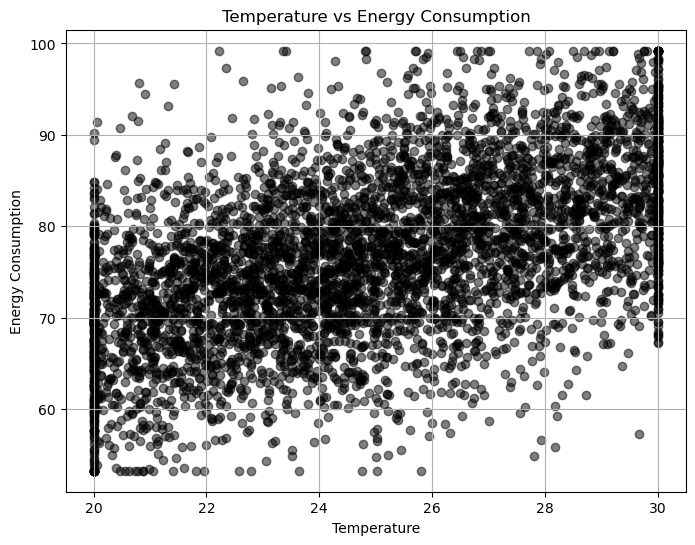

In [31]:
#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['EnergyConsumption'], alpha=0.5, color='BLAck')
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

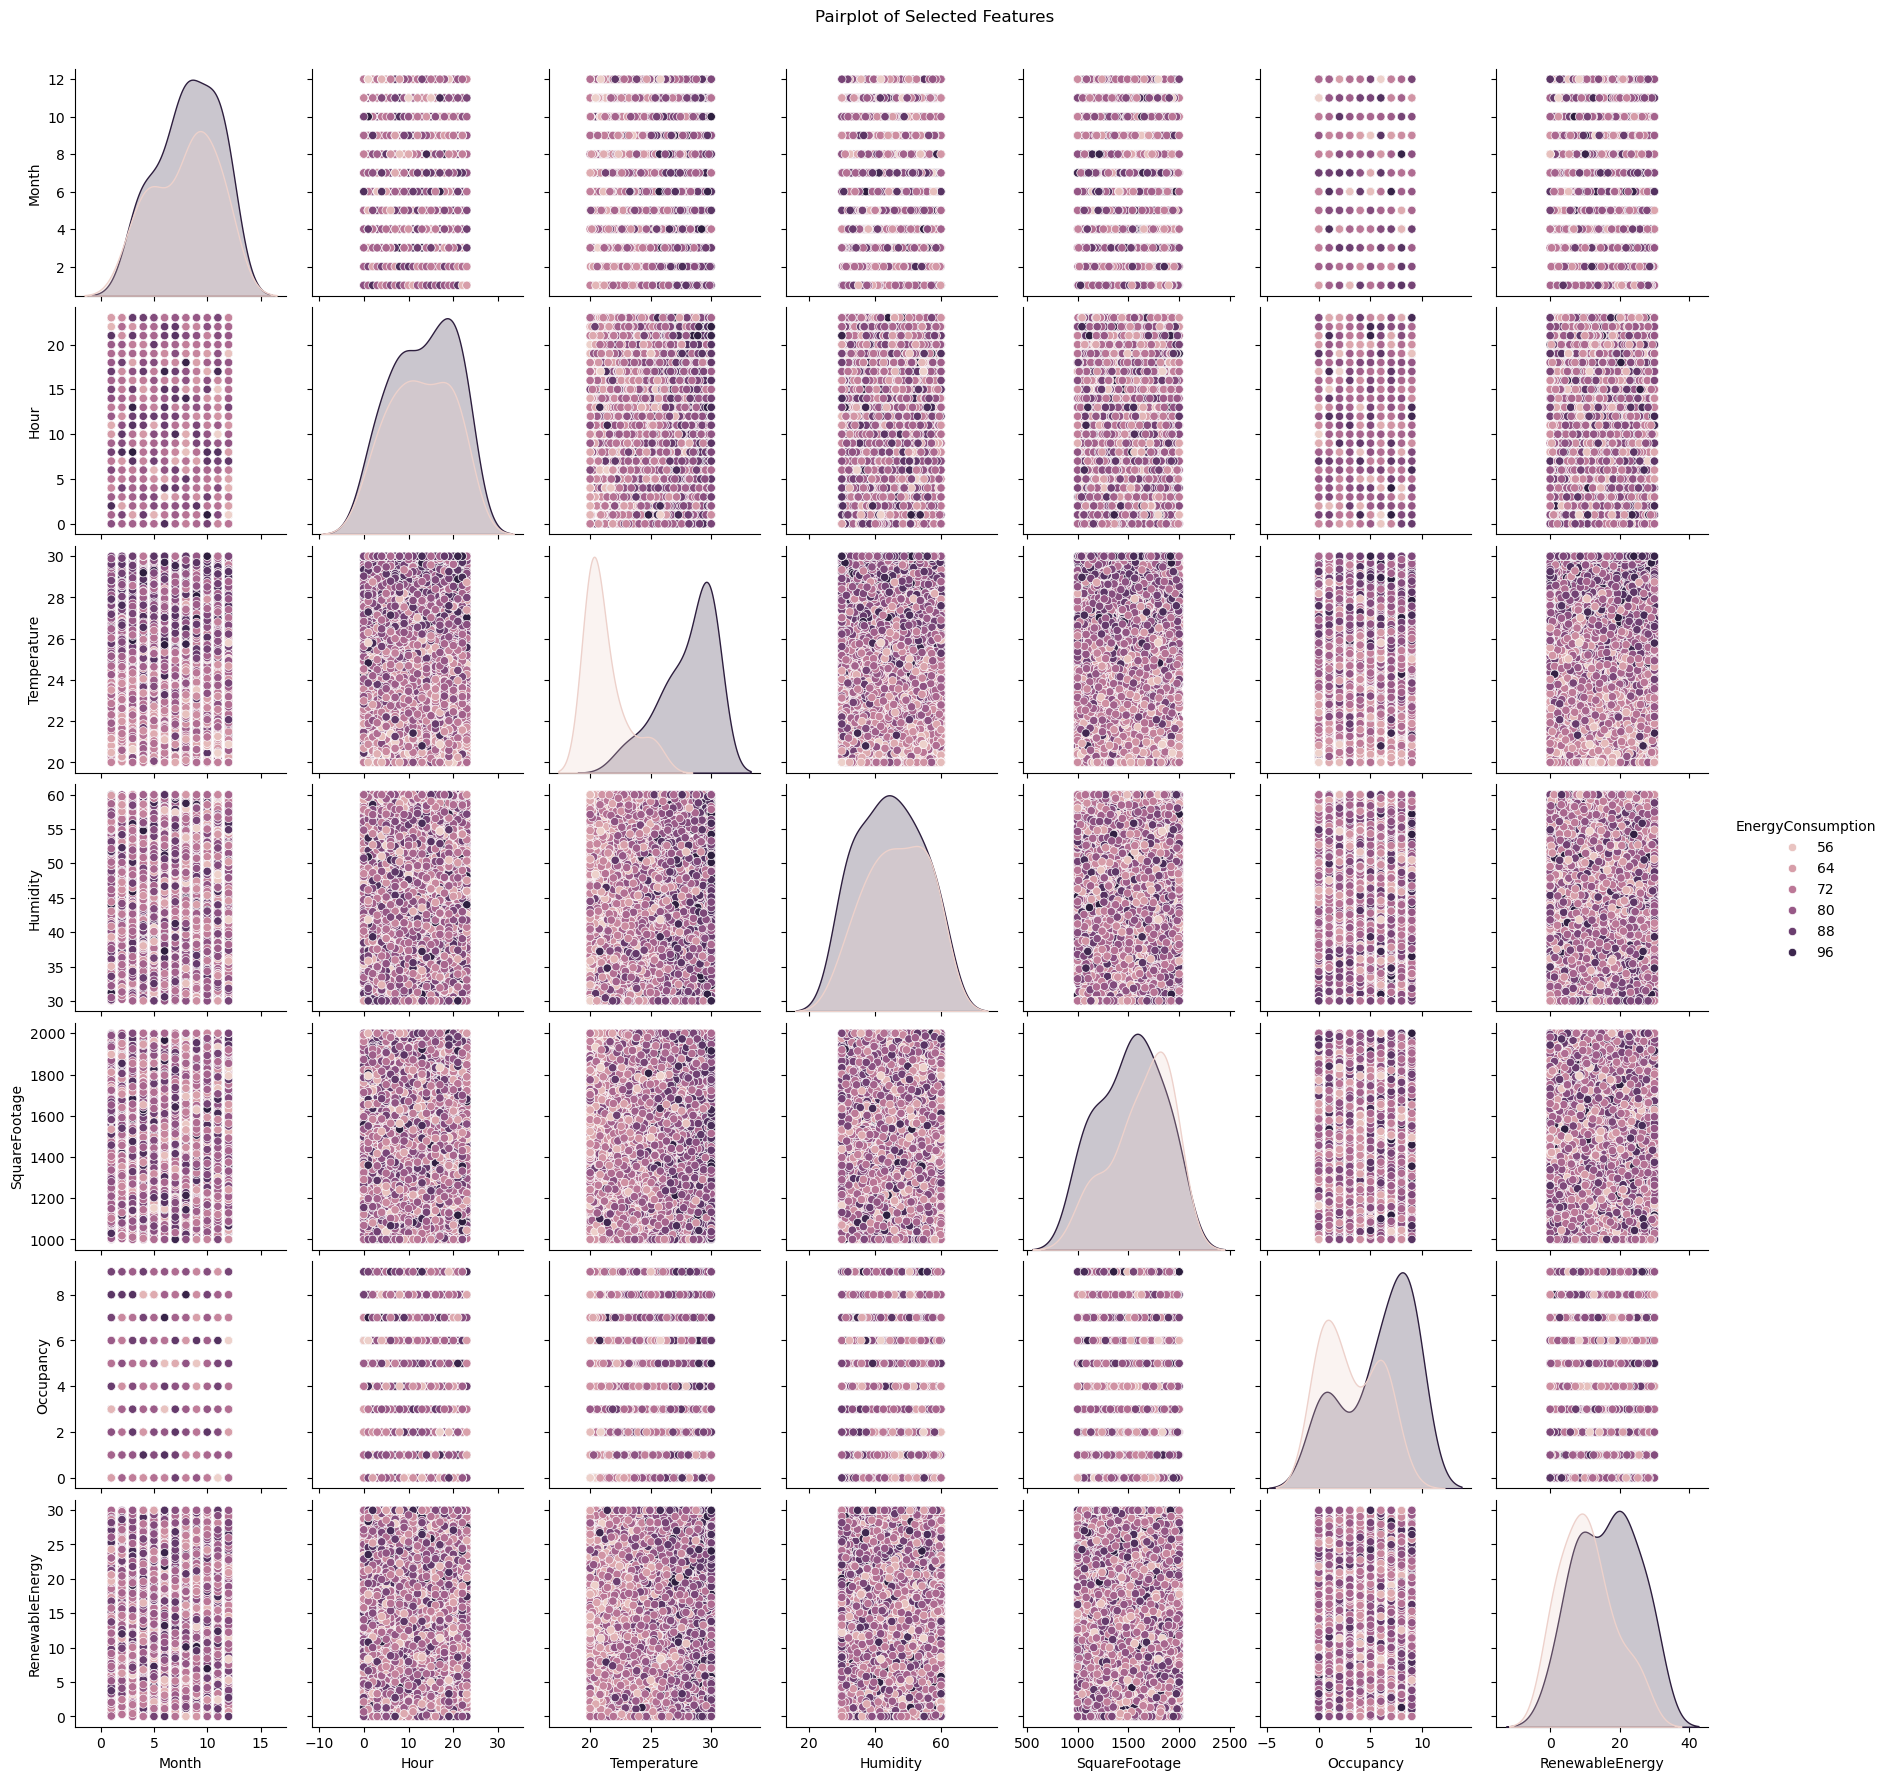

In [43]:
# Pairplot 
selected_columns = ['Month','Hour','DayOfWeek',	'Holiday','Temperature','Humidity','SquareFootage',	'Occupancy','HVACUsage','LightingUsage','RenewableEnergy','EnergyConsumption']
sns.pairplot(df[selected_columns], hue='EnergyConsumption')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

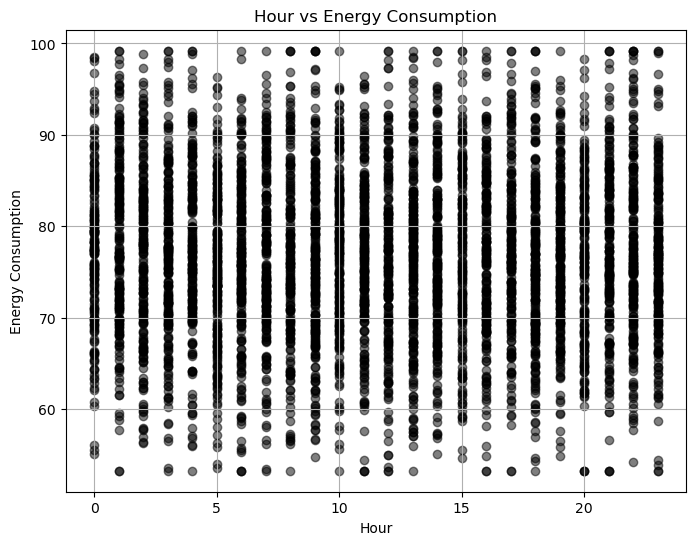

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['Hour'], df['EnergyConsumption'], alpha=0.5, color='BLACK')
plt.title('Hour vs Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

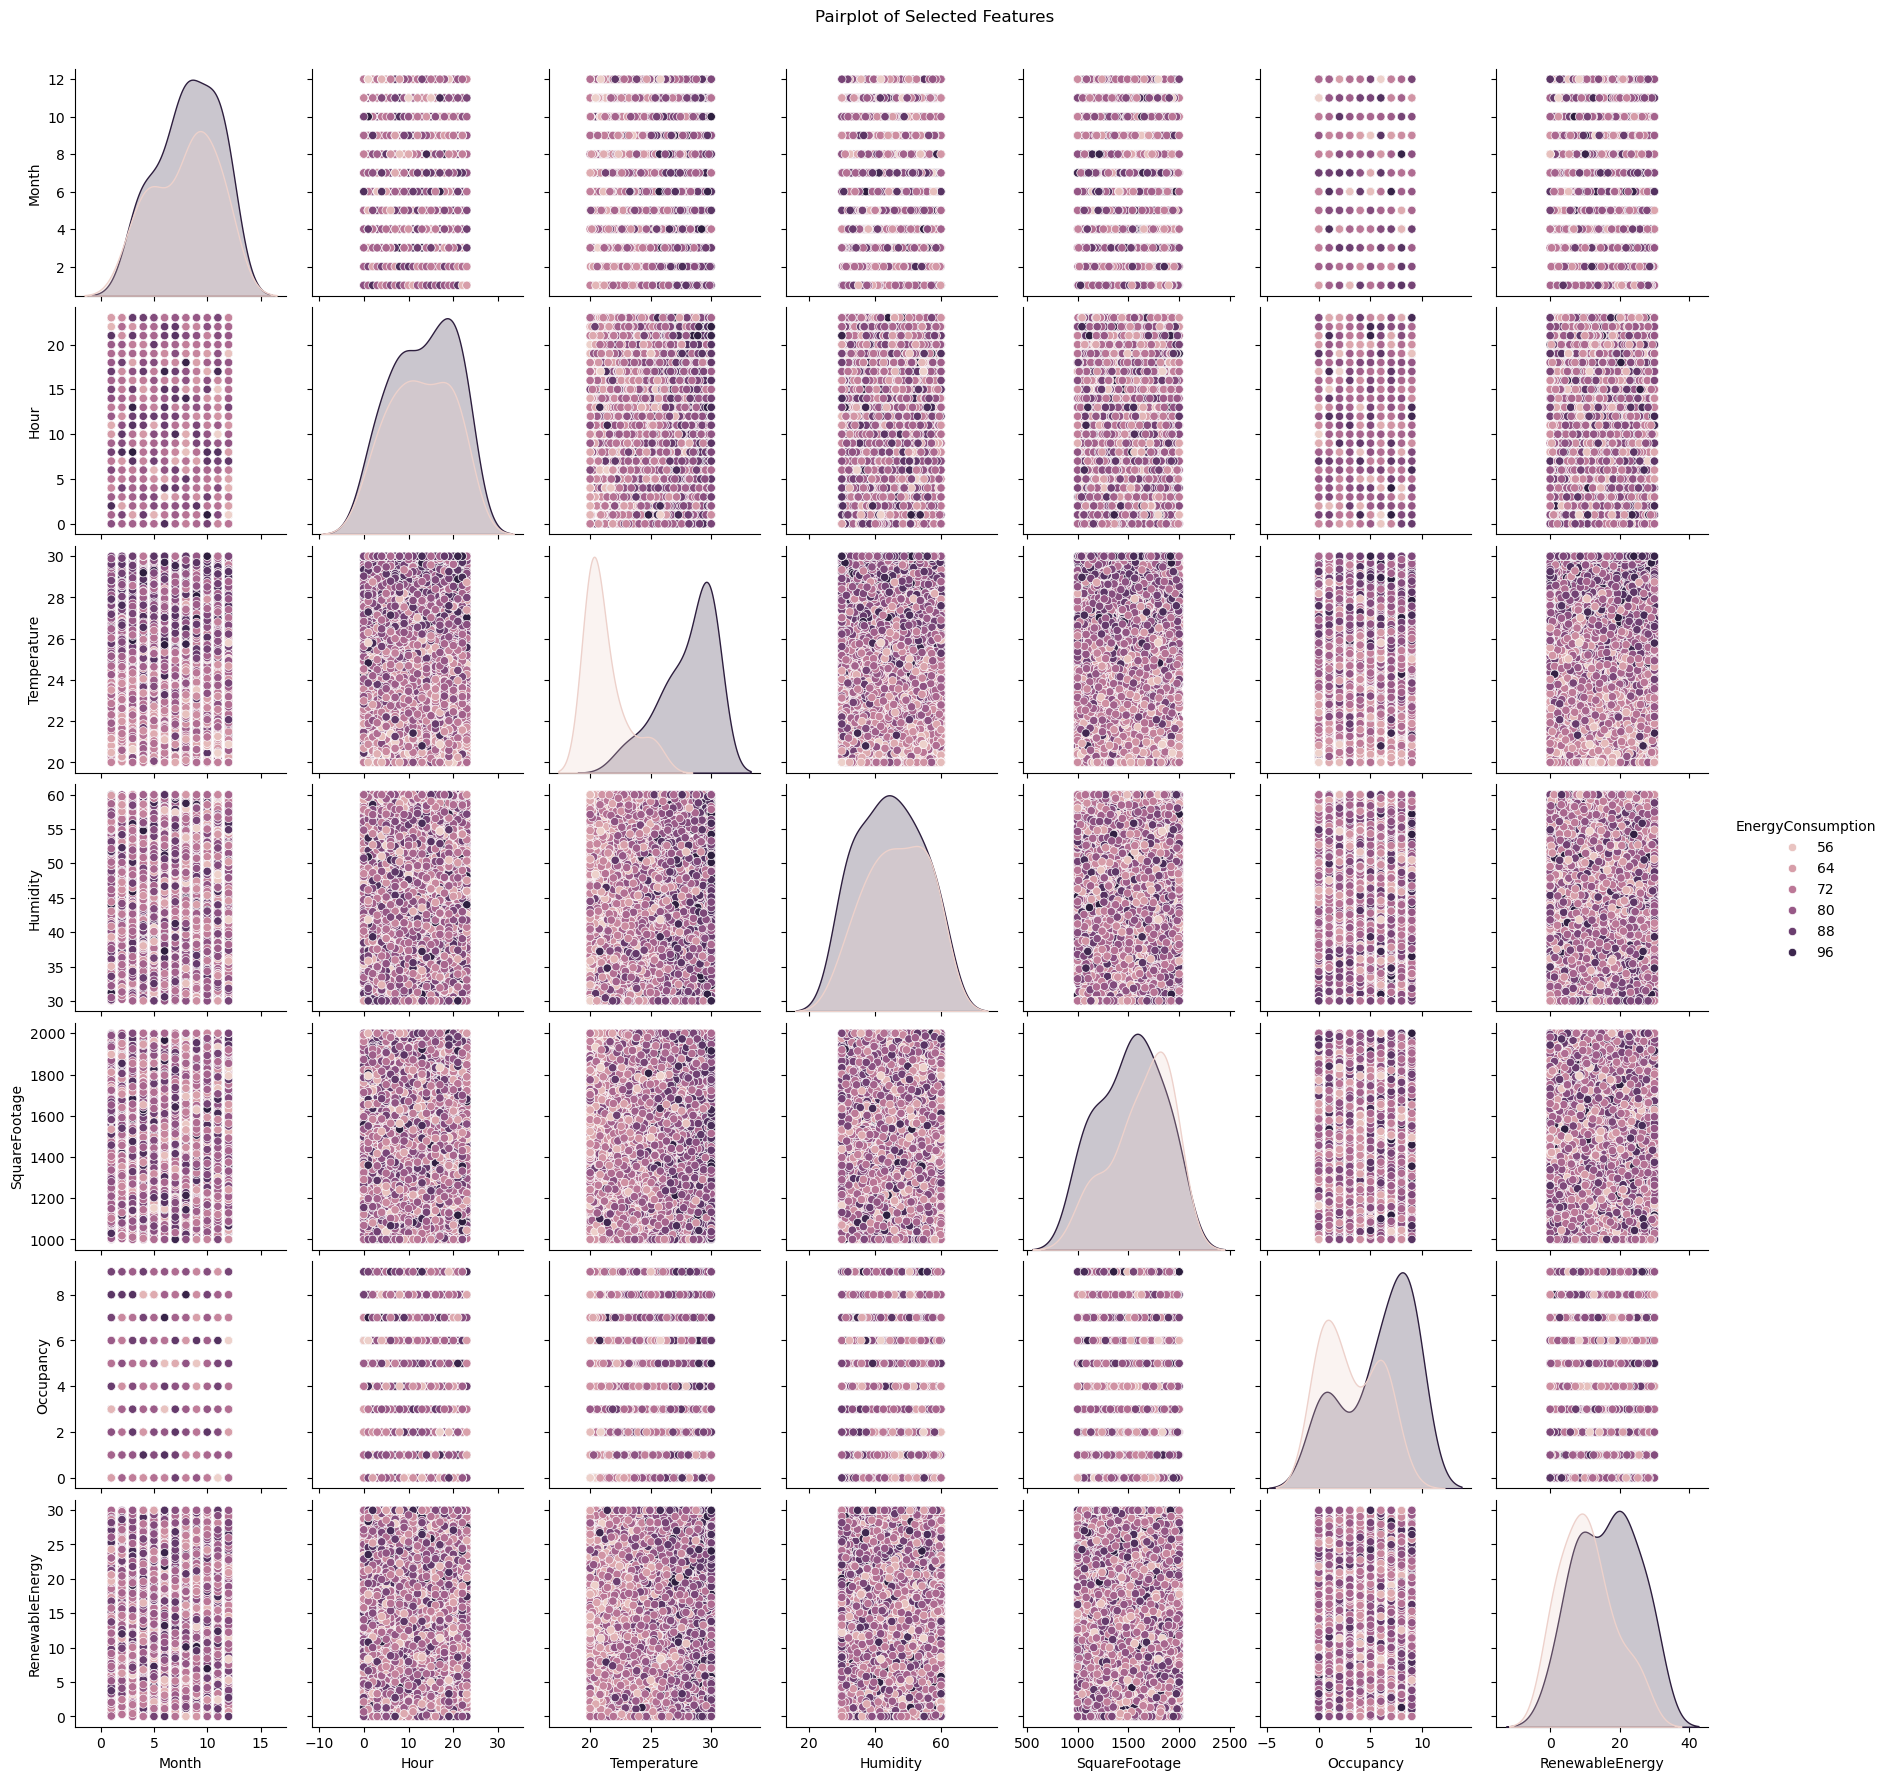

In [40]:
# Pairplot 
selected_columns = ['Month','Hour','DayOfWeek',	'Holiday','Temperature','Humidity','SquareFootage',	'Occupancy','HVACUsage','LightingUsage','RenewableEnergy','EnergyConsumption']
sns.pairplot(df[selected_columns], hue='EnergyConsumption')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

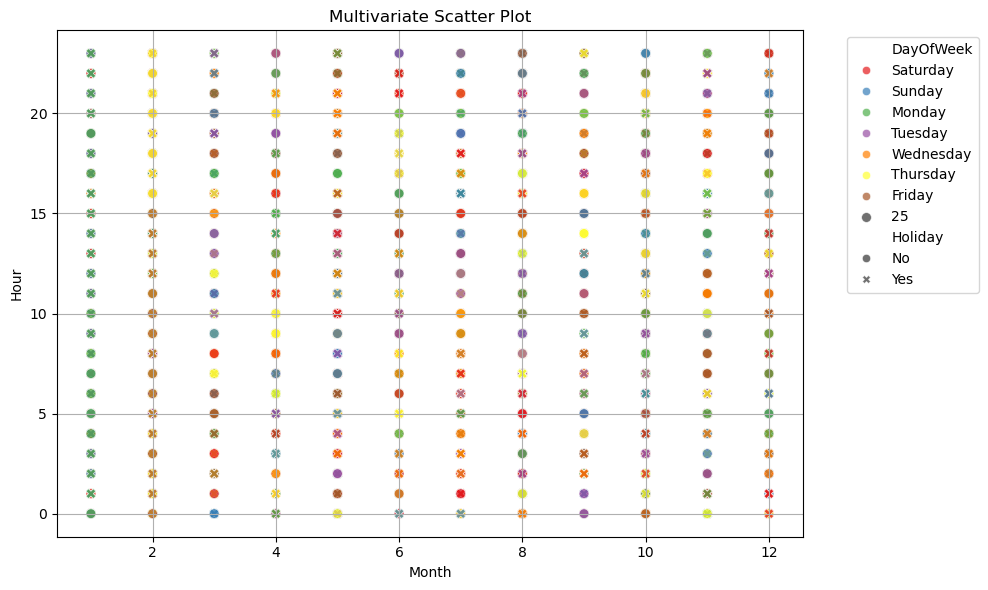

In [41]:
# Multivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Month',
    y='Hour',
    hue='DayOfWeek',
    size=25,
    style='Holiday',
    data=df,
    palette='Set1',
    sizes=(50, 250),  # size range for points
    alpha=0.7
)

plt.title('Multivariate Scatter Plot')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

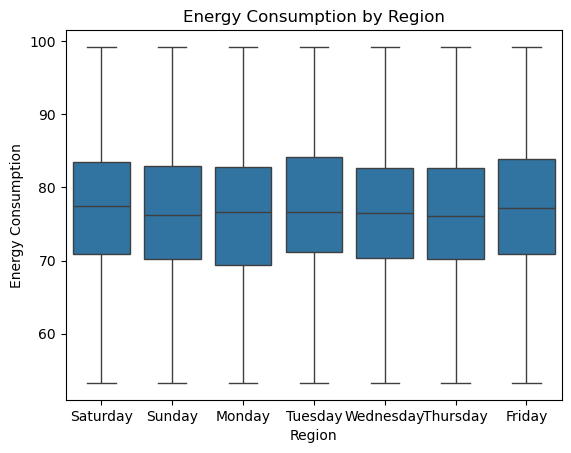

In [42]:
#boxplot
sns.boxplot(x='DayOfWeek', y='EnergyConsumption', data=df)
plt.title('Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption')
plt.show()

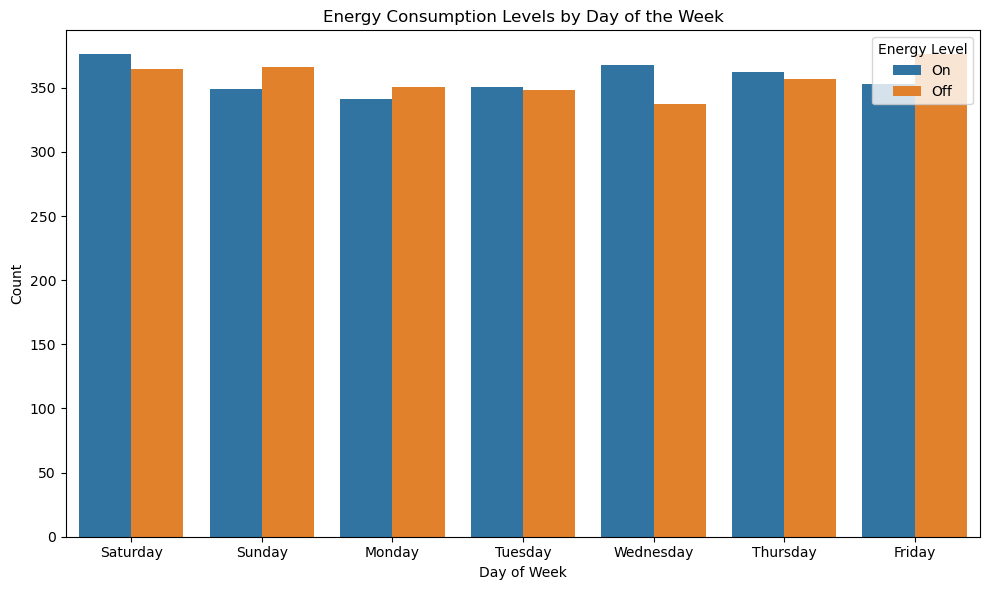

In [59]:
#  Bivariate Analysis DayOfWeek vs HVACUsage
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', hue='HVACUsage', data=df)
plt.title('Energy Consumption Levels by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Energy Level')
plt.tight_layout()
plt.show()


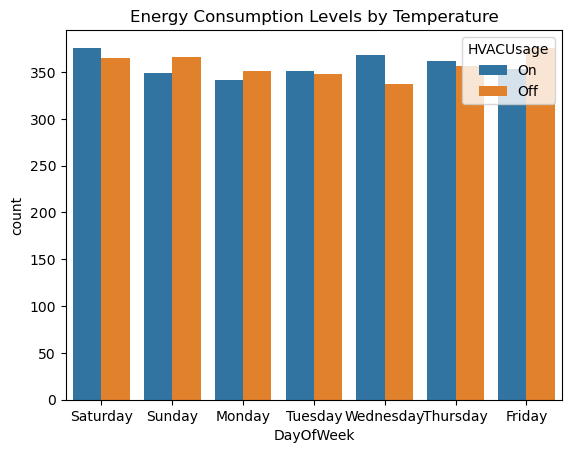

In [61]:
#  Bivariate Analysis DayOfWeek vs HVACUsage
sns.countplot(x='DayOfWeek', hue='HVACUsage', data=df)
plt.title('Energy Consumption Levels by Temperature')
plt.show()